In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../light_mode.mplstyle')

import sys
sys.path.append('../src/')

from sim import Init, Grid
import constants as const
from helper import *


In [2]:
N         = 256
nH_init   = 1e2
vx_init   = 0.
vy_init   = 0.
temp_init = 10
boxsize   = 10*const.pc
Ndot      = 2e48
c_red     = 6e-4*const.c
time_sim  = 100*const.kyr
x_init    = 0

rho_init  = nH_init*const.mH
p_init    = nH_init*const.kB*temp_init


In [3]:
unit = SimpleNamespace(
    length = boxsize,
    time   = const.kyr,
    mass   = const.Msol,
    phot   = 1e54
)
unit.density = unit.mass/unit.length**3
unit.vel = unit.length/unit.time
unit.energy_density = unit.density*unit.vel**2


In [6]:
grid = Grid(N=N, C=0.4, bc_typ=[NEU, NEU], rsolve=HLL, do_thermo=False, sloper=MONCEN)

with Init(grid) as grid:
    
    grid.w[RHO] = rho_init/unit.density
    grid.w[VX]  = vx_init/unit.vel
    grid.w[VY]  = vy_init/unit.vel
    grid.w[P]   = p_init/unit.energy_density
    grid.u[ION] = x_init*rho_init/unit.density
    grid.urad[NPHOT] = 1e-3


In [7]:
#while grid.t < time_sim/unit.time:
for i in range(100):
    
    grid.inject([0.5, 0.5], Ndot/(unit.phot/unit.time))
    grid.step(unit)


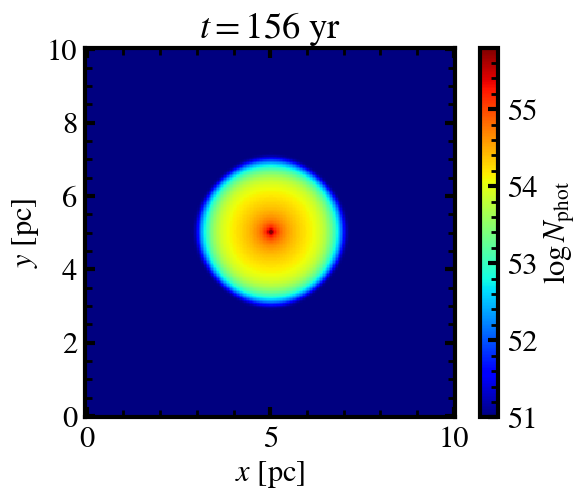

In [8]:
plt.pcolormesh(grid.x*unit.length/const.pc, grid.y*unit.length/const.pc, np.log10(grid.urad[NPHOT]*unit.phot), cmap='jet')
plt.gca().set_aspect(True)
cbar = plt.colorbar()

plt.title(r'$t = %.3g~{\rm yr}$' % (grid.t*unit.time/const.yr))
plt.xlabel(r'$x$ [${\rm pc}$]')
plt.ylabel(r'$y$ [${\rm pc}$]')
cbar.set_label(r'$\log N_{\rm phot}$')


In [9]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


In [21]:
grid = Grid(N=256, C=0.4, bc_typ=np.array([PER, NEU]), rsolve=HLL, sloper=MONCEN, do_rad=False, do_thermo=False)

with Init(grid) as grid:
    
    grid.w[RHO] = 1 * (grid.y<0.5) + 2 * (grid.y>0.5)
    grid.w[VX]  = -0.5 * (grid.y<0.5) + 0.5 * (grid.y>0.5)
    grid.w[VY]  = 0.1 * np.sin(4*np.pi*grid.x) * gaussian(grid.y, 0.5, 0.02)
    grid.w[P]   = 3


In [23]:
# for j in range(250):
    
#     fig, axs = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
#     plt.subplots_adjust(hspace=1e-3, wspace=1e-3)
    
#     for i in range(3):

#         axs[i].set_xticks([])
#         axs[i].set_yticks([])

#         cmap  = ['inferno', 'seismic', 'seismic', ''][i]
#         label = [r'$\Delta \rho$', r'$v_x$', r'$v_y$'][i]
#         lim = [0.5, 0.5, 0.5][i]
#         offset = [1.5, 0, 0][i]
#         im   = axs[i].pcolormesh(grid.x, grid.y, grid.w[i]-offset, cmap=cmap, vmin=-lim, vmax=lim)

#         cax  = axs[i].inset_axes([0, 1, 1, 0.1])
#         cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-0.4, -0.2, 0.0, 0.2, 0.4])

#         cbar.set_label(label)
#         cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
#         cax.xaxis.set_label_position('top')
    
#     axs[0].annotate(r'$t = %d$' % (5*j), (0.05, 0.9), xycoords='axes fraction', horizontalalignment='left')
    
#     # plt.savefig('../media/movie_kelvin/img%.4d.png'%j, dpi=256, bbox_inches='tight')
#     grid.step(5)
#     plt.close()
#     print(j, end=',')


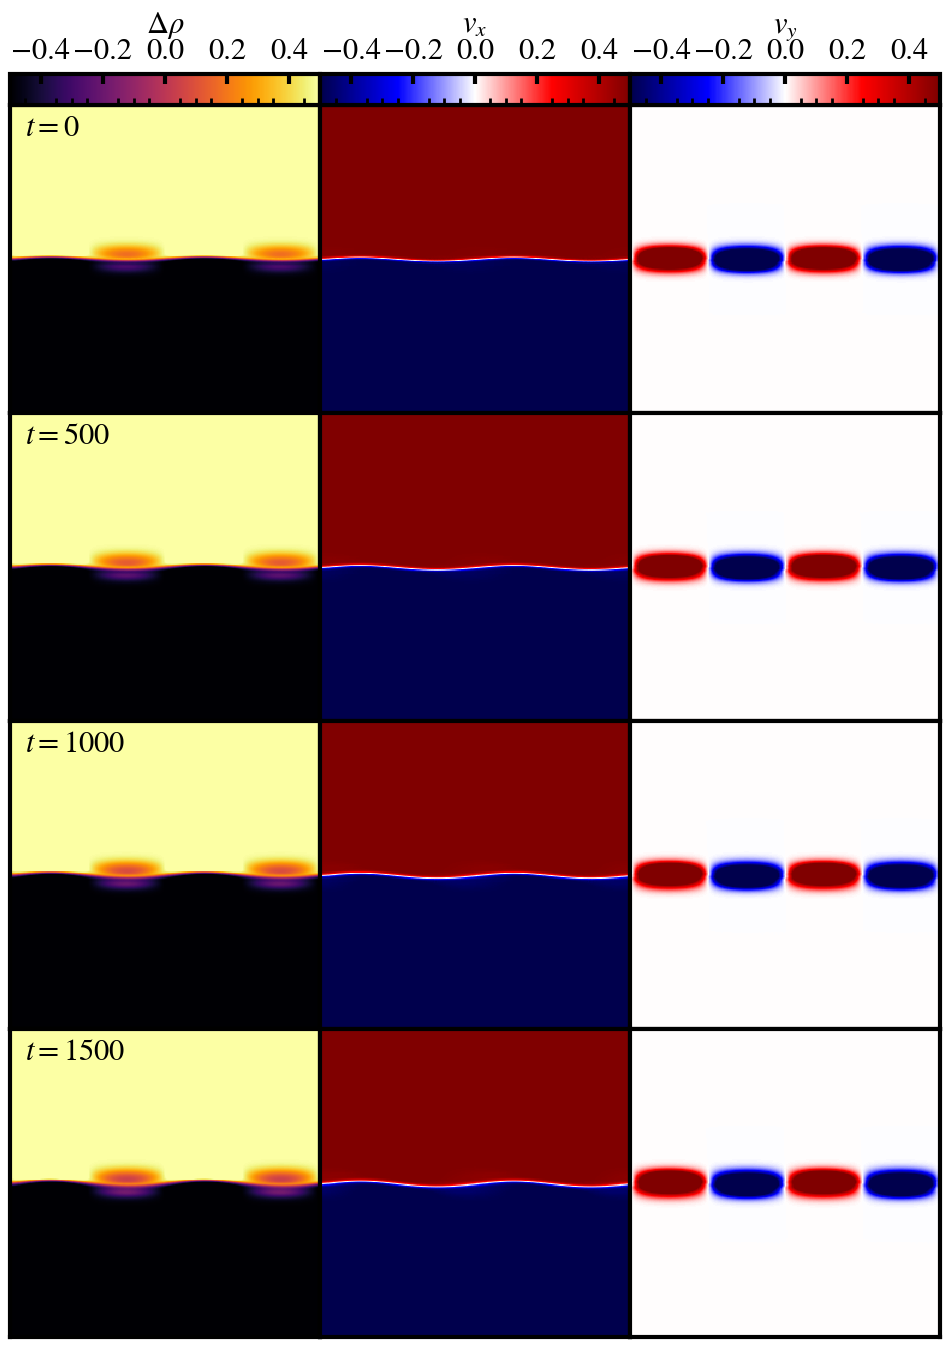

In [26]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(4):
    
    for j in range(3):
        
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        
        cmap  = ['inferno', 'seismic', 'seismic', ''][j]
        label = [r'$\Delta \rho$', r'$v_x$', r'$v_y$'][j]
        lim = [0.5, 0.5, 0.5][j]
        offset = [1.5, 0, 0][j]
        im   = axs[i, j].pcolormesh(grid.x, grid.y, grid.w[j]-offset, cmap=cmap, vmin=-lim, vmax=lim)
        
        if i == 0:
        
            cax  = axs[i, j].inset_axes([0, 1, 1, 0.1])
            cbar = plt.colorbar(im, cax=cax, orientation='horizontal', ticks=[-0.4, -0.2, 0.0, 0.2, 0.4])

            cbar.set_label(label)
            cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            cax.xaxis.set_label_position('top')
            
    axs[i, 0].annotate(r'$t = %d$' % (i*500), (0.05, 0.9), xycoords='axes fraction', horizontalalignment='left')
    
    if i < 3: grid.step(5000, do_print=False)
    
#plt.savefig('kelvin.png', dpi=256, bbox_inches='tight')


In [16]:
grid = Grid(N=256, C=0.4, bc_typ=np.array([NEU, NEU]), do_hydro=False, do_thermo=False)


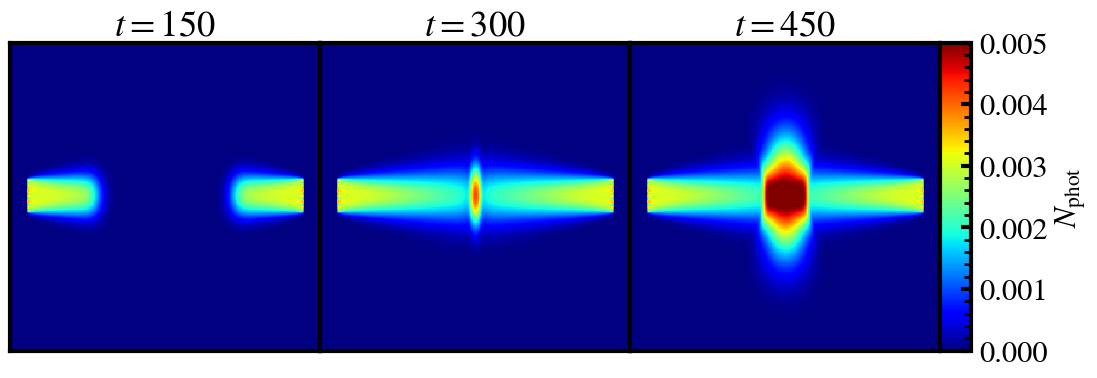

In [18]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(3):

    for j in range(150):
        
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.05, k], 1, xflux=0.99, yflux=0)
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.95, k], 1, xflux=-0.99, yflux=0)
        grid.step(unit)
    
    im = axs[i].pcolormesh(grid.x, grid.y, grid.urad[NPHOT], cmap='jet', vmin=0, vmax=0.005)
    
    axs[i].set_title(r'$t=%d$'%((i+1)*150))
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
cax  = axs[-1].inset_axes([1, 0, 0.1, 1])
cbar = plt.colorbar(im, cax=cax)
cbar.set_label(r'$N_{\rm phot}$')

#plt.savefig('rad.png', dpi=256, bbox_inches='tight')


In [70]:
for i in range(200):

    plt.pcolormesh(grid.x, grid.y, grid.urad[NPHOT], cmap='jet', vmin=0, vmax=0.005)
    plt.gca().set_aspect(True)
    cbar = plt.colorbar()
    cbar.set_label(r'$N_{\rm phot}$')
    plt.title(r'$t=%d$'%(5*i))
    plt.xticks([])
    plt.yticks([])
    
    plt.savefig('movie_rad/img%.4d.png'%i, dpi=256, bbox_inches='tight')
    plt.close()
    
    for j in range(5):
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.05, k], 1, xflux=0.99, yflux=0)
        for k in np.arange(0.45, 0.555, 0.005): grid.inject([0.95, k], 1, xflux=-0.99, yflux=0)
        grid.step()
